## Instalación de librerías

In [32]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


## Importación de la data

In [10]:
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
db = pd.read_csv(r"D:\Users\c101901j\Documents\02. Cursos\Python\Especializacion Estadistica\3 er Trimestre\Machine Learning\Taller 1\1. Data\sand_production_data.csv")

In [16]:
print(db.shape)
print(db.columns)
print(db.head())

(1000, 18)
Index(['Permeability_mD', 'Porosity', 'Compressive_Strength_MPa',
       'Cohesion_MPa', 'Friction_Angle_deg', 'Grain_Size_mm', 'Cement_Quality',
       'Clay_Content', 'Reservoir_Pressure_bar', 'Temperature_C',
       'Water_Saturation', 'Perforation_Density_spm', 'Completion_Type',
       'Flow_Rate_m3day', 'Drawdown_Pressure_bar', 'Oil_Viscosity_cp',
       'Oil_Density_kgm3', 'Sand_Production_Rate_kgday'],
      dtype='object')
   Permeability_mD  Porosity  Compressive_Strength_MPa  Cohesion_MPa  \
0        15.565723  0.219968                 19.598574      0.973754   
1         6.005067  0.196232                 23.843851      1.811692   
2        19.521820  0.152982                 18.660641      2.169116   
3        72.569504  0.117653                 22.536308      4.010150   
4         5.200579  0.184911                  9.851083      2.945242   

   Friction_Angle_deg  Grain_Size_mm  Cement_Quality  Clay_Content  \
0           25.682532       0.158975        0.5018

In [30]:
# Ver columnas, tipos de datos y valores nulos
print(db.info())
print(db.isnull().sum())
print(db.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   permeability_md             1000 non-null   float64
 1   porosity                    1000 non-null   float64
 2   compressive_strength_mpa    1000 non-null   float64
 3   cohesion_mpa                1000 non-null   float64
 4   friction_angle_deg          1000 non-null   float64
 5   grain_size_mm               1000 non-null   float64
 6   cement_quality              1000 non-null   float64
 7   clay_content                1000 non-null   float64
 8   reservoir_pressure_bar      1000 non-null   float64
 9   temperature_c               1000 non-null   float64
 10  water_saturation            1000 non-null   float64
 11  perforation_density_spm     1000 non-null   float64
 12  completion_type             1000 non-null   object 
 13  flow_rate_m3day             1000 n

In [14]:
 #Eliminar filas con datos faltantes
db = db.dropna()

In [17]:
 #Eliminar duplicados
db.drop_duplicates(inplace=True)

In [28]:
#simplificar los nombres
db.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in db.columns]
print (db.columns)

Index(['permeability_md', 'porosity', 'compressive_strength_mpa',
       'cohesion_mpa', 'friction_angle_deg', 'grain_size_mm', 'cement_quality',
       'clay_content', 'reservoir_pressure_bar', 'temperature_c',
       'water_saturation', 'perforation_density_spm', 'completion_type',
       'flow_rate_m3day', 'drawdown_pressure_bar', 'oil_viscosity_cp',
       'oil_density_kgm3', 'sand_production_rate_kgday'],
      dtype='object')


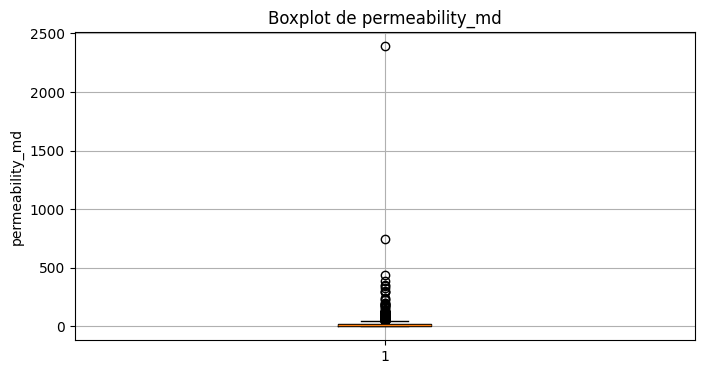

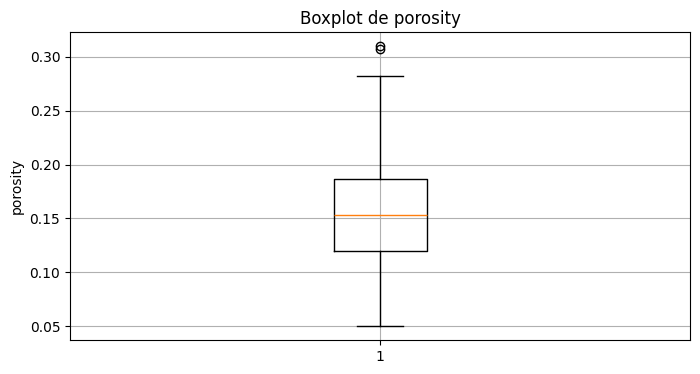

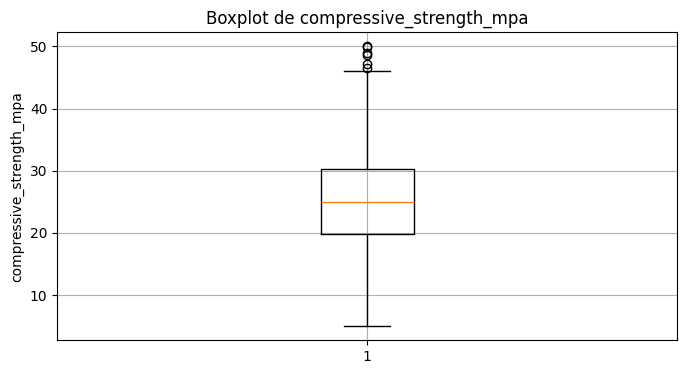

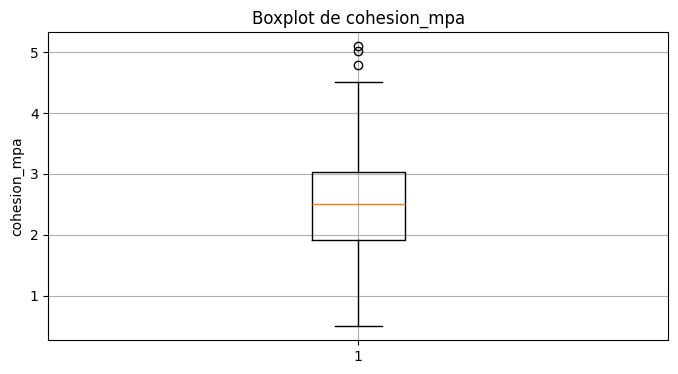

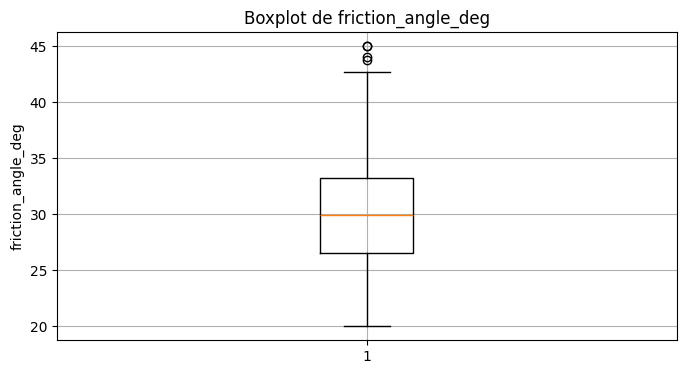

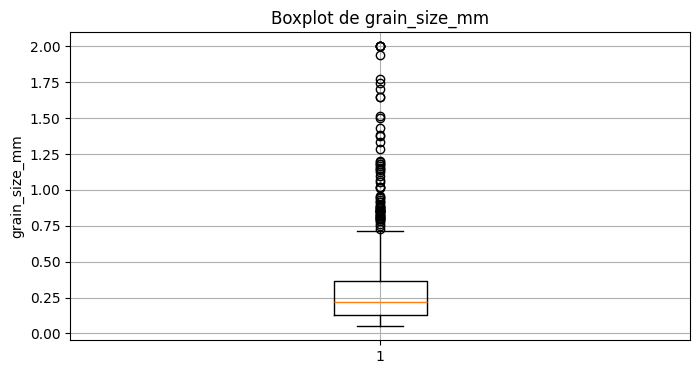

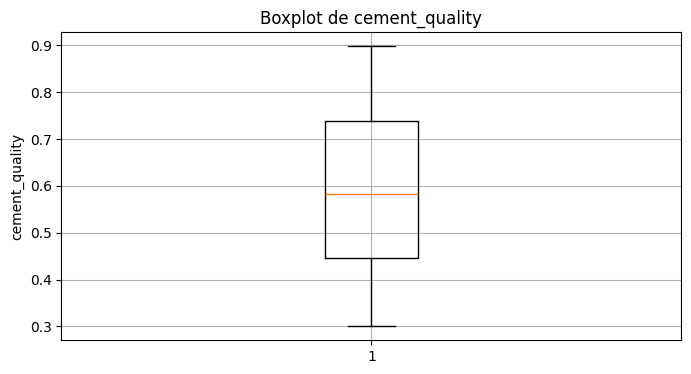

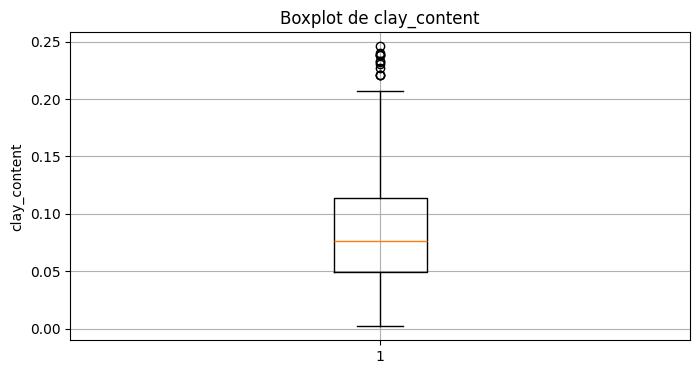

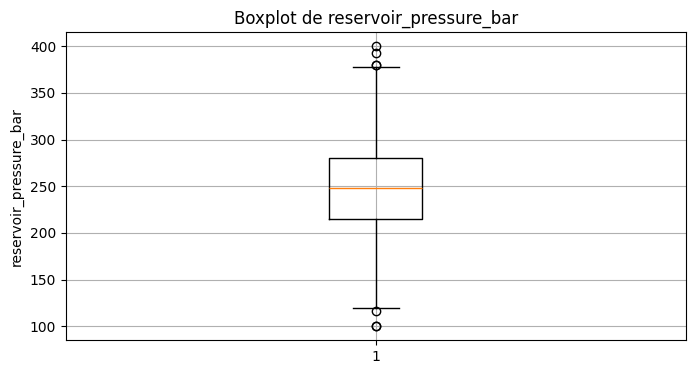

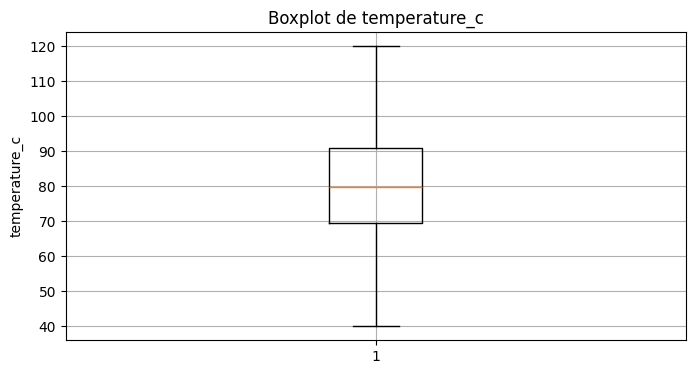

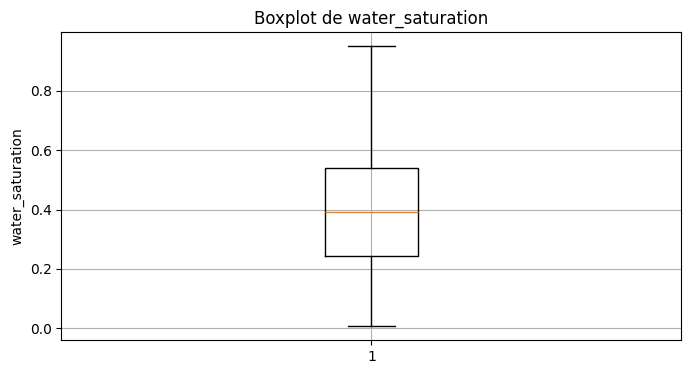

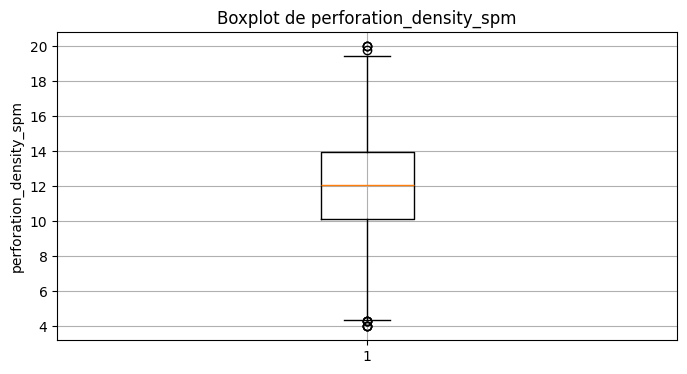

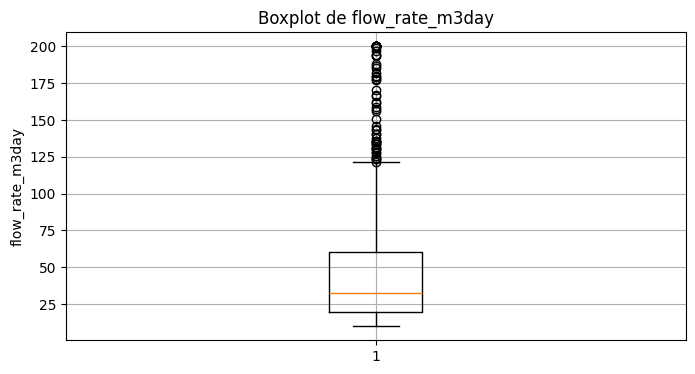

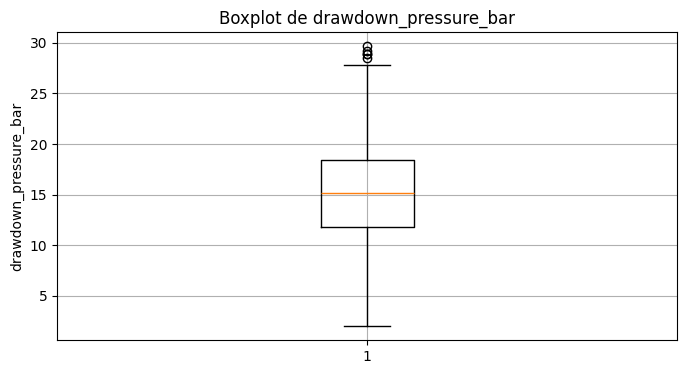

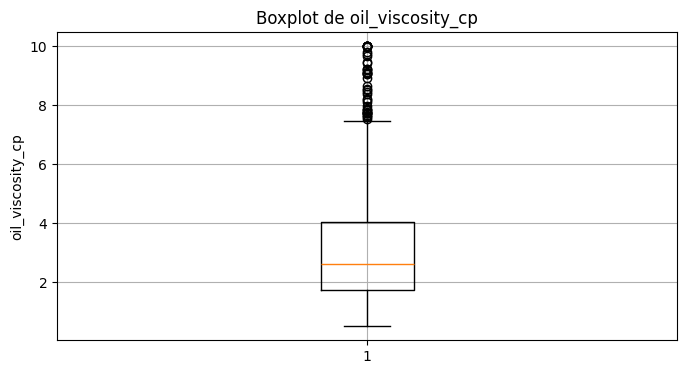

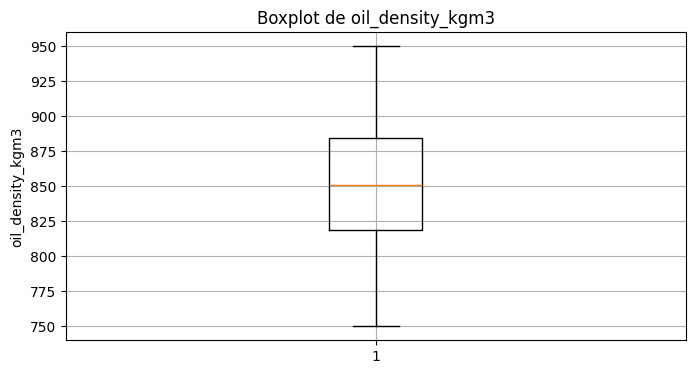

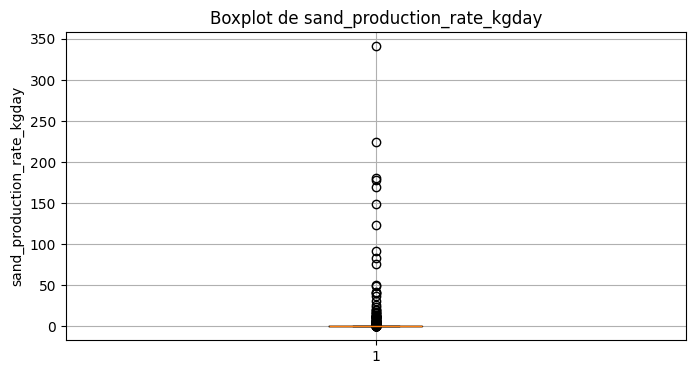

In [41]:
# Seleccionar columnas numéricas
numeric_cols = db.select_dtypes(include='number').columns

# Graficar boxplot por separado para cada variable
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(db[col].dropna())
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [48]:
db_numeric = db.drop('completion_type', axis=1)

In [49]:

# (Assuming 'df' from the Pandas example above is available)
# Calculate the correlation matrix
correlation_matrix = db_numeric.corr()


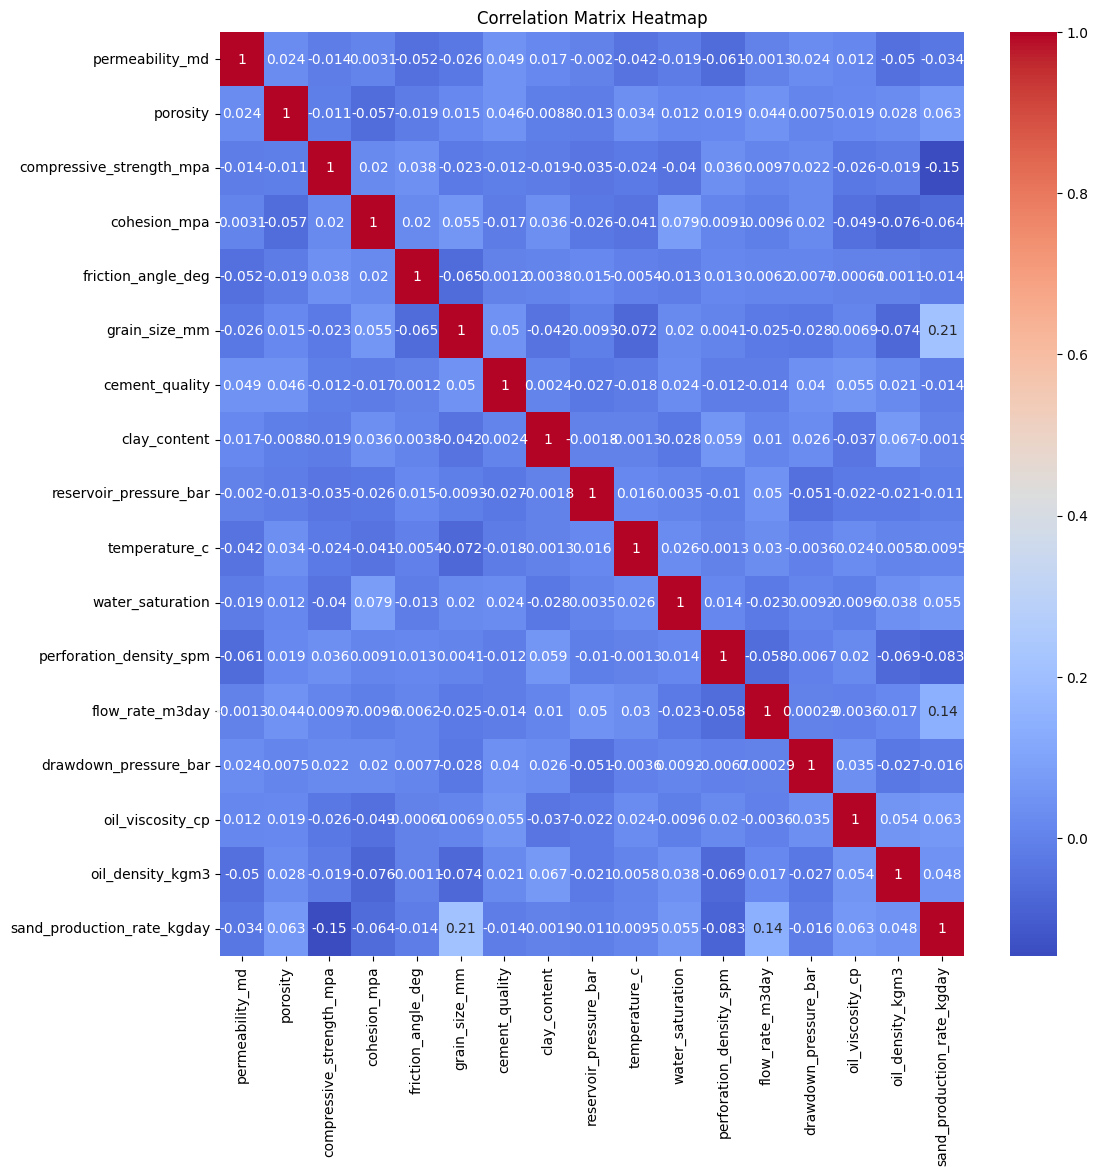

In [51]:
# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

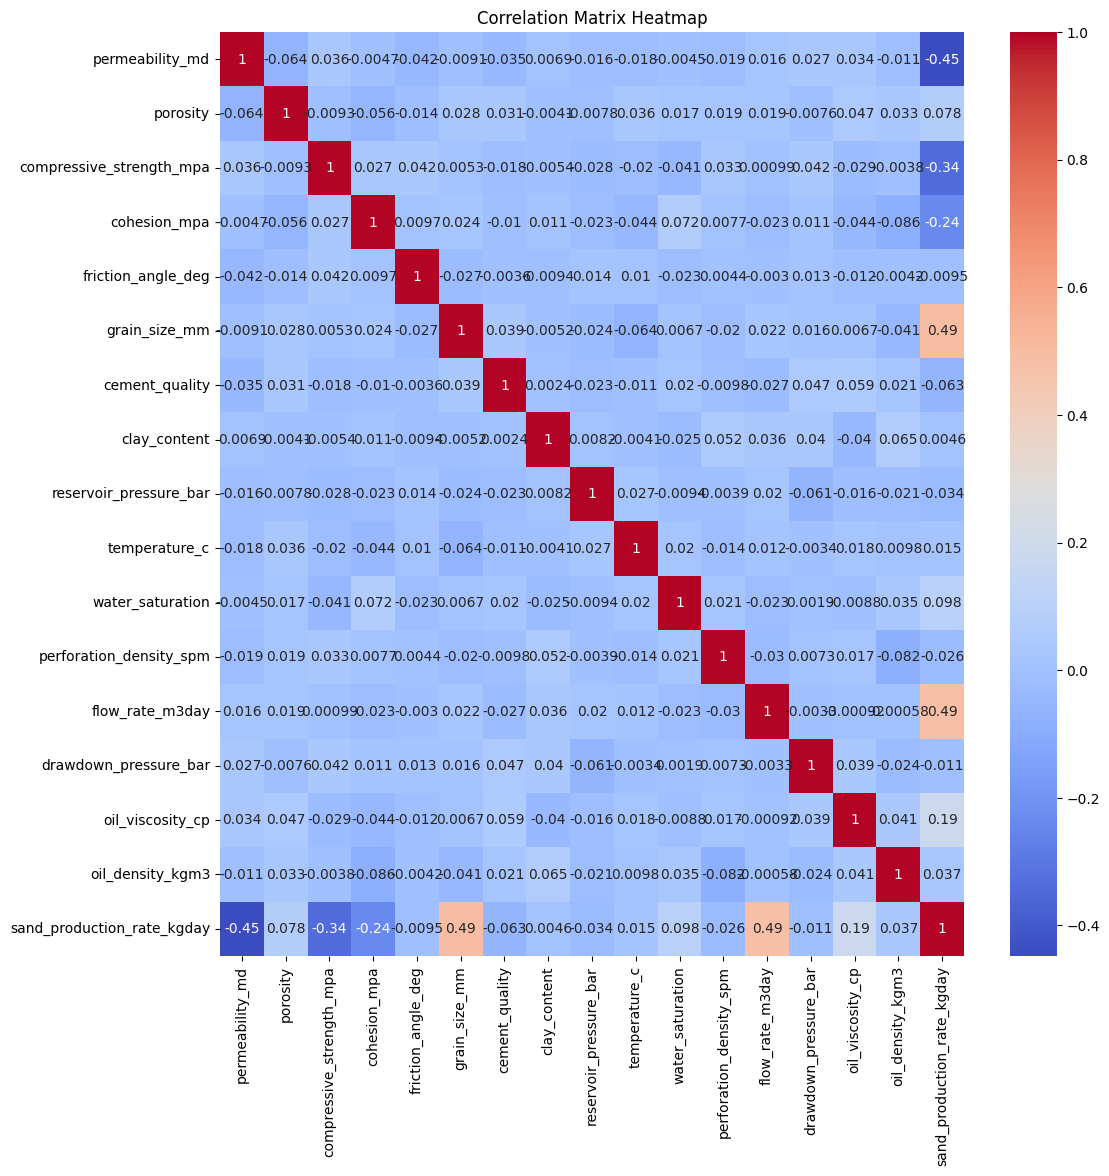

In [52]:
correlation_matrix = db_numeric.corr('spearman')
# Create a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
categorical_cols = db.columns.select_dtypes(include=['object']).columns
print(f"Columnas categóricas a codificar: {list(categorical_cols)}")

db.columns = pd.get_dummies(db, columns=categorical_cols, drop_first=True)

print("Primeras 5 filas del DataFrame con columnas codificadas:")
display(db.head())
print("Nuevas columnas del DataFrame:")
print(db.columns)

NameError: name 'db' is not defined